In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pandas_profiling import ProfileReport

In [2]:
#Read in Data
artists = pd.read_csv('Data/artists.csv')
content = pd.read_csv('Data/content.csv')
genres = pd.read_csv('Data/genres.csv')
labels = pd.read_csv('Data/labels.csv')
reviews = pd.read_csv('Data/reviews.csv')
years = pd.read_csv('Data/years.csv')

In [4]:
#Write out Profile Reports so as not to crowd the notebook
ProfileReport(artists).to_file('Reports/artistsReport.html')
ProfileReport(content).to_file('Reports/contentReport.html')
ProfileReport(genres).to_file('Reports/genresReport.html')
ProfileReport(labels).to_file('Reports/labelsReport.html')
ProfileReport(reviews).to_file('Reports/reviewsReport.html')
ProfileReport(years).to_file('Reports/yearsReport.html')
#When not local, you can view the html files by going to htmlpreview.github.io

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/15 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Things of note:

While the majority of artists only have one album reviewed, some artists such as Neil Young, and David Bowie have more than one review associated with them (one artist, multiple projects). And on the other end some reviews have multiple artists associated (one project, multiple artists).

Each review is quite long, spanning multiple paragraphs. Potential for interesting NLP analysis.

The categories of genre are rock, electronic, experimental, rap, pop/r&b, metal, folk/country, jazz, and global.

The biggest label was no label, as in "self-released". Second is "drag city"

The oldest album reviewed is from 1959. It may be interesting to plot publication year of review, over year album released. Would expect an upward trend but may not be as 1:1 as one might think.

The scores have a mean of 7 with a long left tail. It almost looks normal around the mean.

Only 941 of the 18,372 reviews received a "best new music" award. Potential for a classification task but there is a heavy class imbalance.

Only 432 unique writers for all of these reviews.

Graph Time!

In [42]:
vectorized_len = np.vectorize(lambda x: len(str(x)))
labels['name_length'] = vectorized_len(labels['label'])

longest_label = labels[labels.name_length == max(labels.name_length)].label.unique()
shortest_label = labels[labels.name_length == min(labels.name_length)].label.unique()

print(f'The label with the longest name is: {longest_label}')
print(f'The labels with the shortest names are: {shortest_label}')

The label with the longest name is: ['history always favours the winners']
The labels with the shortest names are: ['a' 'k' 'j']


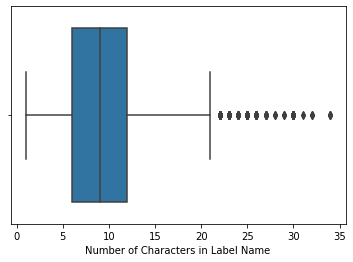

In [79]:
label_length_distr = labels[labels.label.isin(labels.label.unique())].name_length
ax = sn.boxplot(x = label_length_distr)
ax.set_xlabel("Number of Characters in Label Name")
plt.show()

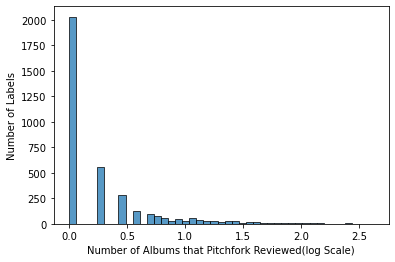

In [84]:
num_reviews_per_label = labels.groupby('label').agg({'reviewid':'count'})

ax = sn.histplot(x = np.log10(num_reviews_per_label['reviewid']))
ax.set_ylabel("Number of Labels")
ax.set_xlabel("Number of Albums that Pitchfork Reviewed(log Scale)")
plt.show()

In [71]:
num_labels = len(num_reviews_per_label)
num_labels_multiple_reviews = sum(num_reviews_per_label['reviewid'] != 1)
print(f'Of {num_labels} labels, {num_labels_multiple_reviews} had more than one album reviewed')

Of 3662 labels, 1633 had more than one album reviewed
